# **MNIST classification with keras model**

import libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, sys
workdir_path = '/content/drive/My Drive/Python/ICA/01_MNIST_keras'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [0]:
import tensorflow as tf
import keras
from keras.datasets import mnist

# importing the Sequential model and the specific layers to be used
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax

# Import dependencies
import json
from keras.models import model_from_json, load_model

Using TensorFlow backend.


set the basic configurations, load the MNIST database and convert it to the necessary format

In [0]:
### configurations
batch_size = 100
num_classes = 10
epochs = 8

# input image dimensions
img_rows, img_cols = 28, 28

# split the data between train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the database
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
# convert to float32 and with range of (0-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# show the shapes 
print('x_train shape:', x_train.shape)
print('x_test shape:', y_train.shape)
print('samples for train: ', x_train.shape[0])
print('samples for test: ', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
x_test shape: (60000,)
samples for train:  60000
samples for test:  10000


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Create, configure and train the model

In [0]:
# create the model
model = Sequential()

# model taken from keras documentation
# adding layers
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# last layer wiht outputs = number of classes
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Configure the model for training
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
# train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/8





60000/60000 [==============================] - 9s 144us/step - loss: 0.2363 - acc: 0.9268 - val_loss: 0.0589 - val_acc: 0.9805
Epoch 2/8
60000/60000 [==============================] - 6s 93us/step - loss: 0.0837 - acc: 0.9750 - val_loss: 0.0389 - val_acc: 0.9859
Epoch 3/8
60000/60000 [==============================] - 6s 93us/step - loss: 0.0630 - acc: 0.9814 - val_loss: 0.0361 - val_acc: 0.9874
Epoch 4/8
60000/60000 [==============================] - 6s 93us/step - loss: 0.0524 - acc: 0.9839 - val_loss: 0.0337 - val_acc: 0.9888
Epoch 5/8
60000/60000 [==============================] - 6s 92us/step - loss: 0.0450 - acc: 0.9862 - val_loss: 0.0290 - val_acc: 0.9898
Epoch 6/8
60000/60000 [==============================] - 6s 93us/step - loss: 0.0396 - acc: 0.9876 - val_loss: 0.0306 - val_acc: 0.9894
Epoch 7/8
60000/60000 [========

Metrics

In [0]:
# show the loss and accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027929882278734296
Test accuracy: 0.9908


Predictions 

6808
prediction:  0
real value:  0


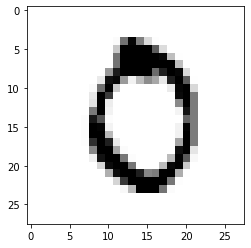

In [0]:
i=randint(1, x_test.shape[0])
print(i)
plt.imshow(x_test[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", model.predict_classes(x_test[i].reshape((1,28,28,1)))[0])
print("real value: ", argmax(y_test[i]))

Save model

In [0]:
# Save the weights
model.save_weights('Keras_model_weights.h5')

# Save the model architecture
with open('Keras_model_architecture.json', 'w') as f:
    f.write(model.to_json())


# Save the model complete with the weights
model.save('Keras_model_complete.h5')

Freeze model


In [0]:
print(model.outputs)
print(model.inputs)

[<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]
[<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>]


In [0]:
from keras import backend as K
import tensorflow as tf

def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        # Graph -> GraphDef ProtoBuf
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = convert_variables_to_constants(session, input_graph_def,
                                                      output_names, freeze_var_names)
        return frozen_graph


frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 35 variables.
INFO:tensorflow:Converted 35 variables to const ops.


In [0]:
# Save to ./model/tf_model.pb
tf.train.write_graph(frozen_graph, "" , "Keras_model_graph_frozen.pb", as_text=False)

'Keras_model_graph_frozen.pb'

Optimize

In [0]:
! python -m tensorflow.python.tools.optimize_for_inference \
--input Keras_model_graph_frozen.pb \
--output Keras_model_graph_optimized.pb \
--input_names=conv2d_1_input \
--output_names=dense_2/Softmax \
--placeholder_type_enum=1

Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
W1126 15:47:50.791708 140579911399296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/tools/strip_unused_lib.py:88: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
Instructions for updating:
Use `tf.compat.v1.graph_util.remove_training_nodes`
W1126 15:47:50.793859 140579911399296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/tools/optimize_for_inference_lib.py:113: remove_training_nodes (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.remove_training_nodes`
